# Лабораторная работа №4.1.
## Клименко Виталий Б01-203
### Лабораторная работа 4.1. (для тех, кто хочет "отлично" по итогу в семестре - обязательно) - задача Штурма-Лиувилля на собственные значения

ВЫБРАТЬ ЛЮБУЮ задачу из XI.9.14 , XI.9.16, XI.9.19 - отыскать спектр и соответствующие собственные функции в условиях задачи обычными подходами. Попробовать применить метод дополненного вектора (перейти к решению нелинейной системы, при этом при использовании метода Ньютона возникнет трехдиагональная матрица).

По методу дополненного вектора и задаче на собственные значения в целом полезно посмотреть пособие Калиткина Н.Н. со стр. 319 . Также прикрепляю пример диссертации , где можно по поиску в тексте посмотреть применение метода доп. вектора  к большой задаче, аппроксимацию ГУ.

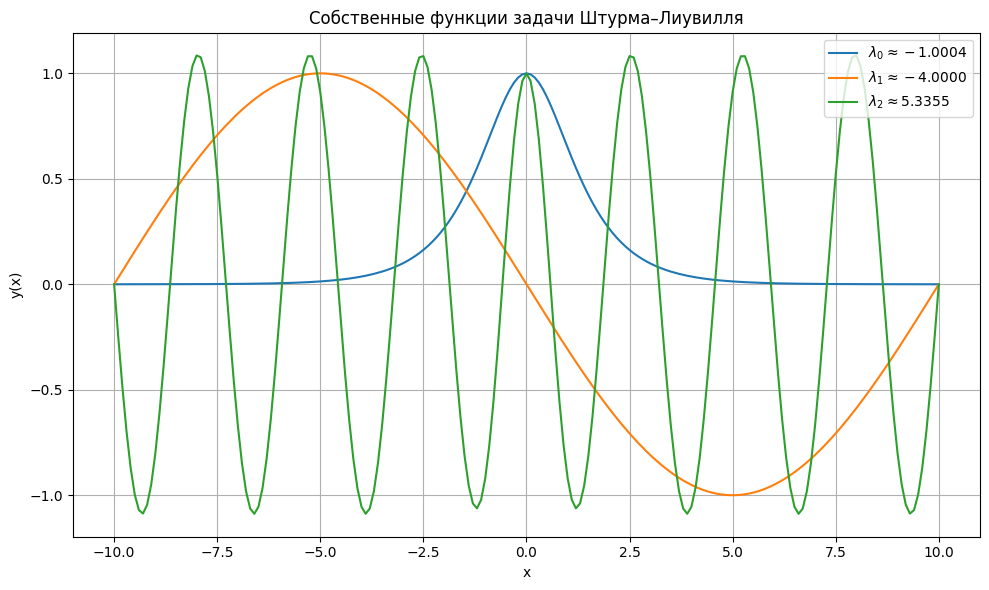

In [23]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt

# задаю сетку
L = 10.0
N = 200
h = 2 * L / N
x = np.linspace(-L, L, N + 1)
M = N - 1  # количество внутренних узлов

# тут просто шинус через чосинус записал
def U(x):
    return -2 / np.cosh(x)**2

# метод дополнительного вектора
def F_extended(y_lambda):
    y = y_lambda[:-1]
    lam = y_lambda[-1]
    F = np.zeros_like(y_lambda)
    y_full = np.zeros(N + 1)
    y_full[1:-1] = y

    # разностная схема для уравнения шрёдингера
    for i in range(1, N):
        F[i - 1] = (
            (y_full[i + 1] - 2 * y_full[i] + y_full[i - 1]) / h**2
            + (lam - U(x[i])) * y_full[i]
        )

    # нормировка
    F[-1] = y_full[N // 2] - 1.0
    return F

# начальное приближение
def initial_guess(n_mode=1):
    xi = x[1:-1]
    y0 = np.sin(n_mode * np.pi * (xi + L) / (2 * L))
    lambda0 = -1.0 * n_mode**2  # наугад
    return np.append(y0, lambda0)

def find_eigenpair(n_mode):
    sol = root(F_extended, initial_guess(n_mode), method='hybr')
    y = np.zeros(N + 1)
    y[1:-1] = sol.x[:-1]
    lam = sol.x[-1]
    return lam, y

# ищем собственные значения
modes = 3
eigenvalues = []
eigenfunctions = []

plt.figure(figsize=(10, 6))
for mode in range(1, modes + 1):
    lam, y = find_eigenpair(mode)
    eigenvalues.append(lam)
    eigenfunctions.append(y)
    plt.plot(x, y, label=f"$\\lambda_{{{mode-1}}} \\approx {lam:.4f}$")

plt.title("Собственные функции задачи Штурма–Лиувилля")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Заключение

Сделал конечно-разностную аппроксимацию;

Использовал метод дополненного вектора из Калиткина.

Нашёл первые два собственных значения и собственные функции.